# <span style="color:blue"> Laboratorio di simulazione numerica </span>
## <span style="color:green">  Esercitazione numero 1</span>

### Esercizio 1.1

Il codice di questa prima parte è contenuta nel file "main1.cpp". 

Nel calcolo dell'integrale  $\langle r \rangle = \int_0^1 r dr$  non si riscontrano criticità e dal grafico sottostante si osserva che i risultati ottenuti con il metodo a blocchi sono consistenti con il valore esatto dell'integrale, pari a $1/2$ .

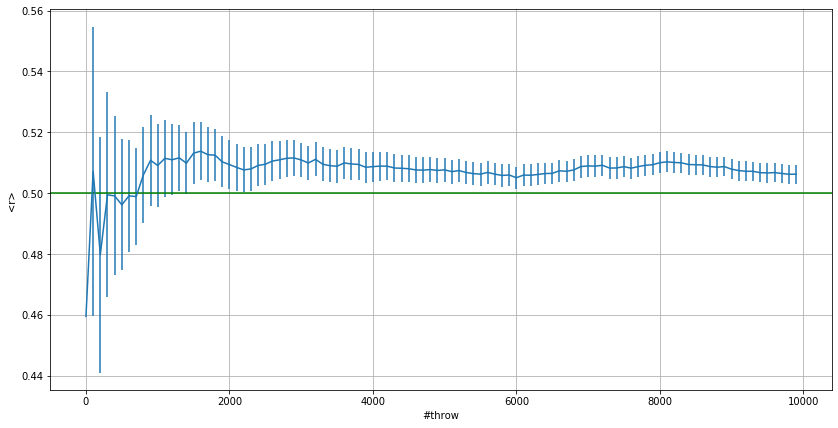

In [2]:
#es 1.1.1
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

fig=plt.figure(figsize=(14,7))
x, f, error = np.loadtxt("data1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y=0.5, color='g', linestyle='-')
plt.xlabel('#throw')
plt.ylabel('<r>')
plt.grid(True)
plt.show()

Si può dire la stessa cosa riguardo al calcolo dell'integrale $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. La linea orizzontale blu è relativa al valore esatto dell'integrale.

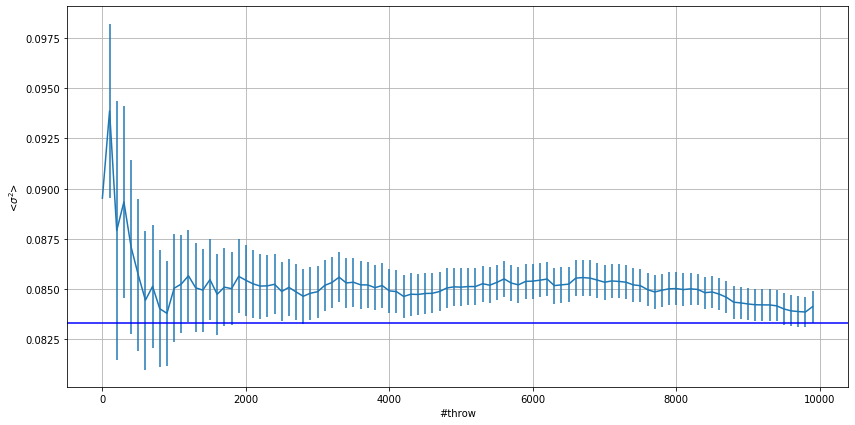

In [8]:
#es.1.1.2
fig=plt.figure(figsize=(14,7))
x, f, error = np.loadtxt("data2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('#throw')
plt.axhline(y=1/12, color='b', linestyle='-')
plt.ylabel('<$\sigma^2$>')
plt.grid(True)
plt.show()

Dal calcolo iterato del $\chi^2$ si osservano valori molto vicini al valore atteso (100) supponendo che la generazione dei numeri casuali segua una distribuzione uniforme, inoltre i valori trovati hanno una dispersione relativamente piccola quindi si può affermare con un alto grado di confidenza che la nostra affermazione è corretta.

media chi^2:  99.2518  dev. standard:  13.671013230920376


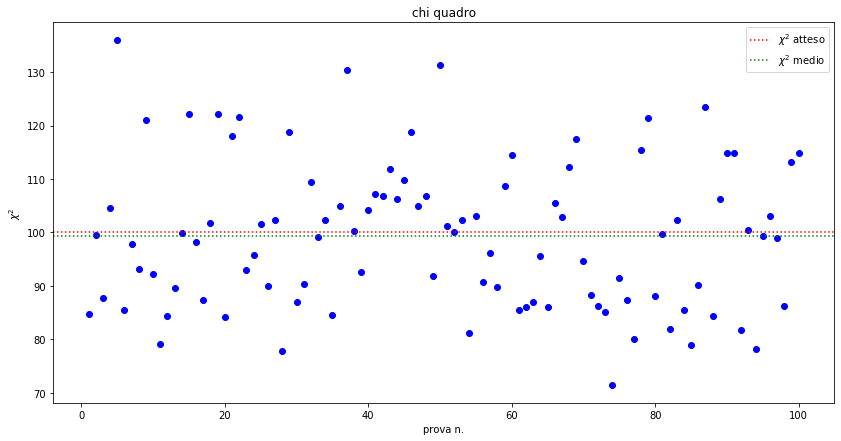

In [26]:
#es 1.1.3

import statistics as stat #per fare statistica 

fig=plt.figure(figsize=(14,7))
x,y = np.loadtxt('data3.dat', delimiter = ' ', unpack = 'True')

mean = stat.mean(y)
dev = stat.pstdev(y)

print ("media chi^2: ", mean , " dev. standard: " , dev )

plt.scatter(x,y,c='blue') #modifica colore 
plt.xlabel('prova n.')
plt.ylabel('$\chi^2$')
plt.title('chi quadro')
plt.axhline(y=100, color='r', linestyle=':',label='$\chi^2$ atteso') 
plt.axhline(y=mean, color='g', linestyle=':', label='$\chi^2$ medio') 
plt.legend()
plt.show()



### Esercizio 1.2

Il codice di questa parte è contenuta nel file "main2.cpp". </p>
Come primo caso viene analizzato il dado uniforme. Come ci si aspetta dal teorema del limite centrale aumentando il numero di termini nella sommatoria $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ l'istogramma assume sempre più un profilo simile a quello di una gaussiana.
La Gaussiana teoricamente in questo caso deve essere centrata in 0.5 e avere una $\sigma=\sqrt{\frac{1}{12*100}}\simeq0.0288$. Questi valori sono in linea con i risultati del fit ( media = 0.4998131654,
$\sigma$ = 0.02864 )


mean 0.4998131654
devst 0.028649636948674284


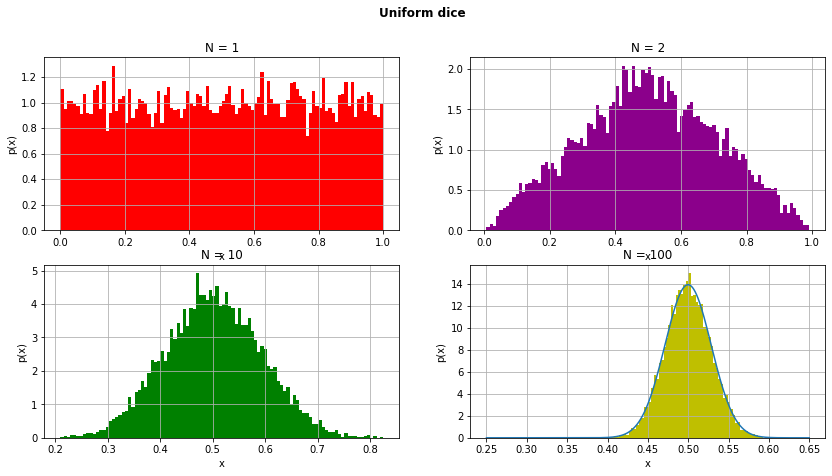

In [28]:
#1.2.2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats



d1=np.loadtxt("dadoUnif.dat",max_rows=10000)
d2=np.loadtxt("dadoUnif.dat",skiprows=10000,max_rows=10000)
d10=np.loadtxt("dadoUnif.dat",skiprows=20000,max_rows=10000)
d100=np.loadtxt("dadoUnif.dat",skiprows=30000,max_rows=10000)
fig=plt.figure(figsize=(14,7))
plt.suptitle("Uniform dice", weight="bold")


#N=1
plt.subplot(221)
plt.hist(d1,100,color="red",density=True)
plt.title("N = 1")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=2
plt.subplot(222)
plt.hist(d2,100,color="darkmagenta",density=True)
plt.title("N = 2")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=10
plt.subplot(223)
plt.hist(d10,100,color="green",density=True)
plt.title("N = 10")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=100
plt.subplot(224)
plt.hist(d100,100,color="y",density=True)
plt.title("N = 100")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)


#fit Gaussiano
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(d100))
m, s = stats.norm.fit(d100) 
pdf_g = stats.norm.pdf(lnspc, m, s)  
print('mean',m)
print('devst', s)
plt.plot(lnspc, pdf_g)
plt.show() 



Per quanto riguarda il dado esponenziale è stata usata una distribuzione con $\lambda$ pari a 1, per questo ci si aspetta una Gaussiana centrata in 1 con $\sigma = \sqrt{\frac{1}{100}}=0.1$ in accordo con i parametri del fit (media = 0.9993790525, $\sigma$ = 0.10040643747131826)

mean 0.9993790525
devst 0.10040643747131826


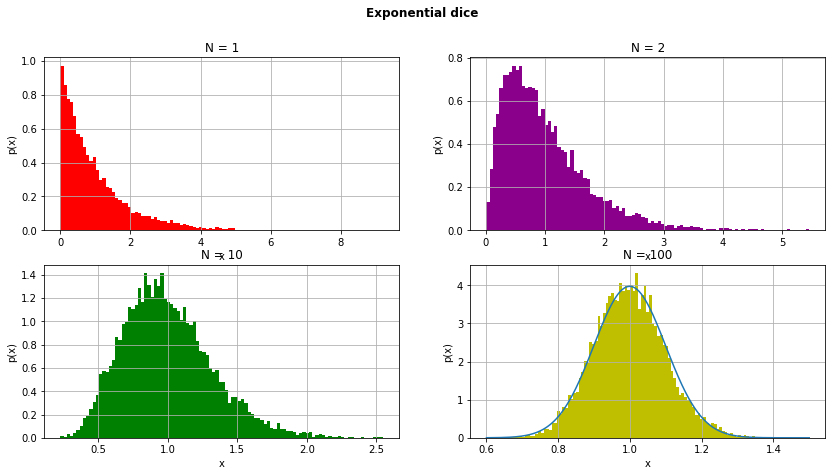

In [25]:
##### Dado exp

d1=np.loadtxt("dadoExp.dat",max_rows=10000)
d2=np.loadtxt("dadoExp.dat",skiprows=10000,max_rows=10000)
d10=np.loadtxt("dadoExp.dat",skiprows=20000,max_rows=10000)
d100=np.loadtxt("dadoExp.dat",skiprows=30000,max_rows=10000)
fig=plt.figure(figsize=(14,7))
plt.suptitle("Exponential dice", weight="bold")


#N=1
plt.subplot(221)
plt.hist(d1,100,color="r",density=True)
plt.title("N = 1")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=2
plt.subplot(222)
plt.hist(d2,100,color="darkmagenta",density=True)
plt.title("N = 2")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=10
plt.subplot(223)
plt.hist(d10,100,color="green",density=True)
plt.title("N = 10")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=100
plt.subplot(224)
plt.hist(d100,100,color="y",density=True)
plt.title("N = 100")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#fit Gaussiano
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(d100))
m, s = stats.norm.fit(d100) 
pdf_g = stats.norm.pdf(lnspc, m, s)
print('mean',m)
print('devst', s)
plt.plot(lnspc, pdf_g)
plt.show() 


Infine per un dado che segue la distribuzione di Lorentz, impostando come parametri $\mu=0$ e $\Gamma=1$ come ci si aspetta dalla teoria la distribuzione limite non è una Gaussiana ma appunto una Lorentziana

-0.019535952280096996 0.8801314506469134


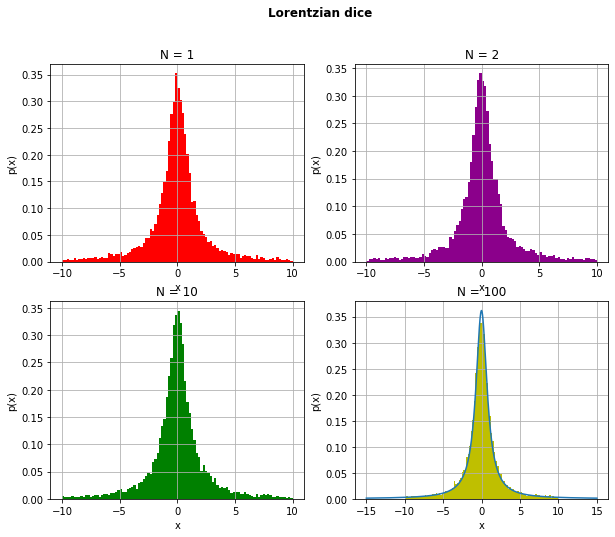

In [27]:
from scipy.stats import cauchy

#Dado lor

l1=np.loadtxt("dadoLor.dat",max_rows=10000)
l2=np.loadtxt("dadoLor.dat",skiprows=10000,max_rows=10000)
l10=np.loadtxt("dadoLor.dat",skiprows=20000,max_rows=10000)
l100=np.loadtxt("dadoLor.dat",skiprows=30000,max_rows=10000)
fig=plt.figure(figsize=(10,8))
plt.suptitle("Lorentzian dice", weight="bold")


#N=1
plt.subplot(221)
plt.hist(l1,100,range=(-10,10),color="red",density=True)
plt.title("N = 1")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=2
plt.subplot(222)
plt.hist(l2,100,range=(-10,10),color="darkmagenta",density=True)
plt.title("N = 2")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=10
plt.subplot(223)
plt.hist(l10,100,range=(-10,10),color="green",density=True)
plt.title("N = 10")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)

#N=100
plt.subplot(224)
plt.hist(l100,100,range=(-10,10),color="y",density=True)
plt.title("N = 100")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid(True)


#fit Lorentiano
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(l100))
p, m = stats.cauchy.fit(l100) 
pdf_l = stats.cauchy.pdf(lnspc, p, m)
print (p,m)
plt.plot(lnspc, pdf_l)
plt.show() 

### Esercizio 1.3

Il codice di questa sezione è contenuto nel file "main3.cpp".</p>
Tralasciando la spiegazione dell'algoritmo di Buffon vorrei soffermarmi sull'implementazione dell'algoritmo su cui ho alcune precisazioni da fare. 

Prima di tutto un po di dati: Ho considerato un pavimento quadrato in cui la distanza tra le righe è di 1.0 (cm) e quella dell'ago 0.5 (cm), il numero di righe è pari a $10^5$.

Per evitare di usare $\pi$ in una simulazione che ha l'intento di andarlo a valutare, la posizione dell'ago non è stata ottenuta attraverso un sistema di coordinate polari, ma generando quattro numeri che andavano a definire una coppia di punti all'interno del quadrato(P1 e P2). In questo modo si è definita la direzione dell'ago e un estremo (ho scelto P1) ma non il verso che ho deciso essere dato dal vettore che va dal punto P1 al punto P2.

Con il primo metodo (quello "polare") si sarebbero potuti usare solo tre parametri liberi (centro e angolo) mentre in quello implementato se ne usano quattro, la scelta è stata fatta solo per comodità infatti volendo si poteva generare una coppia di valori che definivano un punto nel quadrato e poi un valore che andava da $0 $ a $4*10^5$ che andava a definire un punto sul perimetro del quadrato, in questo modo si usavano solo tre parametri. 

Per quanto riguarda il metodo a blocchi anziché valutare $\pi$ ho preferito calcolare $\frac{1}{\pi}$ e il relativo errore per poi usare le formule della teoria degli errori per ottenere il valore desiderato con la sua incertezza, infatti i singoli valori ottenuti di $\frac{1}{\pi}$ sono indipendenti tra di loro ( debolbente dipendenti dal momento che si usa un generatore pseudo casuale) e gli errori associati sono molto piccoli, di un ordine $10^{-2}$ come si può evincere dal grafico "errori".

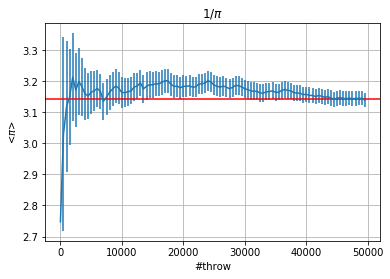

In [54]:
# es 1.3
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
x, f, error = np.loadtxt("Buffon.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.axhline(y = 3.14159 , color='r', linestyle='-')
plt.title("1/$\pi$")
plt.xlabel('#throw')
plt.ylabel('<$\pi$>')
plt.grid(True)
plt.show()

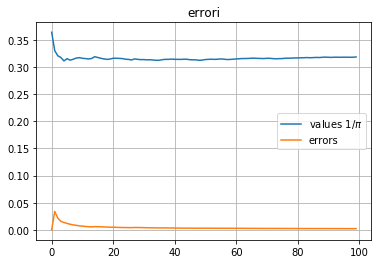

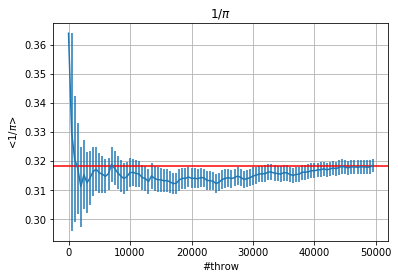

In [53]:
x, f, error = np.loadtxt("Buffon0.dat", usecols=(0,1,2), delimiter=' ', unpack='true')


plt.plot(f,label='values 1/$\pi$')
plt.plot(error,label='errors')
plt.title("errori")
plt.grid(True)
plt.legend()
plt.show()

plt.errorbar(x,f,yerr=error)
plt.axhline(y = 1/3.14159 , color='r', linestyle='-')
plt.title("1/$\pi$")
plt.xlabel('#throw')
plt.ylabel('<1/$\pi$>')
plt.grid(True)
plt.show()

Dal grafico del metodo a blocchi si osserva una buona convergenza al valore esatto.